## **Descarga y carga del modelo Word2Vec de Google News**

## Paso 1: Configuraci√≥n de librer√≠as

En este paso importamos las librer√≠as necesarias para:
- Cargar y manipular datos
- Procesar texto con NLTK
- Utilizar Word2Vec y construir redes LSTM

Esto asegura que todas las dependencias est√©n disponibles antes de continuar.

In [1]:
!pip install gensim


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.0/61.0 kB 1.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26.7/26.7 MB 82.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.3/18.3 MB 99.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38.6/38.6 MB 59.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing instal

## **BLOQUE 1: CONFIGURACI√ìN INICIAL**

In [3]:
# Importaci√≥n de librer√≠as
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile


# Para procesamiento de texto
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Para modelos
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from gensim.models import KeyedVectors  # ‚úÖ correcto


# Confirmacion de reproducibilidad
import tensorflow as tf



## **BLOQUE 2: PREPROCESAMIENTO DE TEXTOS**

En esta secci√≥n limpiamos y preparamos los textos para su an√°lisis, aplicando las siguientes operaciones:

1. Eliminaci√≥n de caracteres no alfab√©ticos (como puntuaci√≥n)  
2. Conversi√≥n a min√∫sculas
3. Eliminaci√≥n de espacios redundantes
4. Tokenizaci√≥n y filtrado de stopwords en espa√±ol



In [5]:

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Lista de stopwords en espa√±ol
STOPWORDS = set(stopwords.words('spanish'))


# Limpieza del texto
def clean_text(text):
    """
    Limpia el texto eliminando caracteres no alfab√©ticos y pasando todo a min√∫sculas.
    """
    # Eliminaci√≥n de caracteres no letras
    text = re.sub(r'[^a-zA-Z√°√©√≠√≥√∫√º√±√Å√â√ç√ì√ö√ú√ë\s]', '', text)

    # Pasar a min√∫sculas
    text = text.lower()

    # Eliminaci√≥n de espacios m√∫ltiples
    text = re.sub(r'\s+', ' ', text).strip()

    return text


# Funci√≥n para tokenizar el texto
def tokenize_text(text):
    """
    Tokeniza el texto en palabras, eliminando stopwords.
    """
    tokens = word_tokenize(text, language='spanish')
    tokens = [word for word in tokens if word not in STOPWORDS]
    return tokens


# Funci√≥n completa para preparacion de textos
def preprocess_text(text):
    """
    Aplica limpieza + tokenizaci√≥n a un texto dado.
    """
    cleaned_text = clean_text(text)
    tokens = tokenize_text(cleaned_text)
    return tokens


# Prueba en un texto suelto:
example_text = "¬°Hola hermano! ¬øC√≥mo est√°s? Este es nuestro primer texto para procesar."
tokens = preprocess_text(example_text)

print("‚úÖ Texto preprocesado:", tokens)


‚úÖ Texto preprocesado: ['hola', 'hermano', 'c√≥mo', 'primer', 'texto', 'procesar']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [7]:
from gensim.models import KeyedVectors

w2v_model = KeyedVectors.load_word2vec_format(
    '/content/drive/MyDrive/Topicos Especiales 2/Proyecto Final/GoogleNews-vectors-negative300.bin',
    binary=True
)

print("‚úÖ Modelo Word2Vec cargado exitosamente.")


‚úÖ Modelo Word2Vec cargado exitosamente.


## **BLOQUE 3: VECTORIZACI√ìN CON WORD2VEC**

En esta secci√≥n convertimos las palabras tokenizadas en vectores num√©ricos usando el modelo Word2Vec preentrenado. Esto transforma el texto en una representaci√≥n distribuida √∫til para el modelo LSTM.

1. Las palabras no reconocidas por el modelo se descartan.
2. Cada vector tiene una dimensi√≥n de 300, correspondiente al modelo de Google News.
3. Se muestra un ejemplo de vectorizaci√≥n aplicada a una lista de tokens.

In [8]:

def vectorize_text(tokens, w2v_model, vector_size=300):
    """
    Convierte una lista de tokens en una lista de vectores usando Word2Vec.
    Si una palabra no est√° en el vocabulario, se ignora.
    """
    vectors = []
    for word in tokens:
        if word in w2v_model:
            vectors.append(w2v_model[word])
        else:
            continue
    return vectors


# Prueba de uso, usamos ejemplo
example_vectors = vectorize_text(tokens, w2v_model)

print(f"‚úÖ N√∫mero de vectores obtenidos: {len(example_vectors)}")
print(f"Dimensi√≥n de cada vector: {example_vectors[0].shape if example_vectors else 'N/A'}")


‚úÖ N√∫mero de vectores obtenidos: 5
Dimensi√≥n de cada vector: (300,)


# **Generaci√≥n de dataset sint√©tico realista usando Word2Vec**

En este paso:
1. Se importan las librer√≠as necesarias para el modelado y entrenamiento.
2. Se establecen semillas para garantizar reproducibilidad.
3. Se carga el modelo Word2Vec preentrenado (GoogleNews-vectors-negative300.bin) usando Gensim.

‚ö†Ô∏è Este archivo debe descargarse previamente y colocarse en el path correspondiente en Google Drive.

Esta base vectorial ser√° utilizada m√°s adelante para representar frases generadas artificialmente a partir de vocabularios sem√°nticos controlados.

In [9]:
# Importar librer√≠as necesarias
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Establecer semilla
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# Cargar modelo Word2Vec (.bin)
w2v_model = KeyedVectors.load_word2vec_format(
    '/content/drive/MyDrive/Topicos Especiales 2/Proyecto Final/GoogleNews-vectors-negative300.bin',
    binary=True
)
print("‚úÖ Modelo Word2Vec cargado")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


‚úÖ Modelo Word2Vec cargado


# **Dataset sint√©tico balanceado y realista (500.000 textos)**

En esta secci√≥n generamos un conjunto de datos sint√©tico balanceado y realista, compuesto por 500.000 frases (250.000 por clase), utilizando vocabularios tem√°ticos amplios.
Objetivos del bloque:
1. Crear frases artificiales con palabras coherentes dentro de cada clase.
2. Aplicar Word2Vec para garantizar realismo sem√°ntico.
3. Etiquetar autom√°ticamente el dataset para entrenamiento supervisado.

In [10]:

# Palabras clase 1: nobleza / realeza (ampliado)
clase_1_palabras = [
    "king", "queen", "prince", "princess", "duke", "duchess", "monarch", "noble",
    "throne", "palace", "castle", "crown", "royal", "heir", "regent", "lord",
    "lady", "sovereign", "dynasty", "realm", "court", "empire", "nobility", "kingdom",
    "scepter", "lineage", "chivalry", "aristocracy", "gown", "herald"
]

# Palabras clase 0: transporte / automotores (ampliado)
clase_0_palabras = [
    "car", "truck", "bus", "train", "metro", "van", "engine", "wheel", "garage",
    "fuel", "brake", "horn", "steering", "tire", "gear", "diesel", "driver",
    "transmission", "mirror", "bumper", "exhaust", "chassis", "dashboard", "airbag",
    "mechanic", "road", "highway", "parking", "traffic", "windshield"
]

# Funci√≥n para generar frases m√°s largas y variadas
def generar_frases(palabras, cantidad=250000, longitud=15):
    frases = []
    for _ in range(cantidad):
        frase = " ".join(random.choices(palabras, k=longitud))
        frases.append(frase)
    return frases

# Generar frases
frases_clase_1 = generar_frases(clase_1_palabras, cantidad=250000)
frases_clase_0 = generar_frases(clase_0_palabras, cantidad=250000)

# Combinar y etiquetar
texts = frases_clase_1 + frases_clase_0
labels = [1]*250000 + [0]*250000

# Mezclar el dataset
combined = list(zip(texts, labels))
random.shuffle(combined)
texts, labels = zip(*combined)

print(f"‚úÖ Dataset generado: {len(texts)} textos sint√©ticos")
print("Ejemplo:", texts[0], "->", labels[0])


‚úÖ Dataset generado: 500000 textos sint√©ticos
Ejemplo: monarch duchess dynasty gown duke gown court monarch king scepter chivalry prince sovereign kingdom lord -> 1


# **BLOQUE 2: Preprocesar + Vectorizar todo el dataset**

En este bloque limpiamos el texto, lo tokenizamos, y convertimos cada palabra en un vector sem√°ntico usando el modelo Word2Vec. Este paso es fundamental para que las redes neuronales puedan procesar lenguaje natural como datos num√©ricos.

In [11]:
# Funci√≥n de preprocesamiento (limpieza + tokenizaci√≥n)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

# Funci√≥n para vectorizar
def vectorize_text(tokens, w2v_model, vector_size=300):
    vectors = []
    for word in tokens:
        if word in w2v_model:
            vectors.append(w2v_model[word])
    return vectors

# Preprocesar y vectorizar todo el dataset
tokenized_texts = [preprocess_text(text) for text in texts]
vectorized_texts = [vectorize_text(tokens, w2v_model) for tokens in tokenized_texts]

# Eliminar textos que no generaron vectores
X = []
y = []
for vecs, label in zip(vectorized_texts, labels):
    if len(vecs) > 0:
        X.append(vecs)
        y.append(label)

# Conversion etiquetas a array
y = np.array(y)

print(f"‚úÖ Textos vectorizados: {len(X)} ejemplos")


‚úÖ Textos vectorizados: 500000 ejemplos


# **BLOQUE 3: Padding + Divisi√≥n Train/Test**

Para que las redes LSTM procesen datos correctamente, todas las secuencias deben tener la misma longitud. Este bloque se encarga de:

1. Aplicar padding manual para normalizar la longitud de las frases vectorizadas.
2. Realizar la divisi√≥n entre conjuntos de entrenamiento y prueba.
3. Confirmar la forma final del conjunto de datos.

In [13]:

from sklearn.model_selection import train_test_split

# Funci√≥n de padding manual
def prepare_sequences(list_of_vectors, max_len=None):
    """
    Convierte una lista de listas de vectores en un array 3D con padding manual.
    """
    vector_sequences = [np.array(seq) for seq in list_of_vectors]

    if not vector_sequences:
        return None

    if max_len is None:
        max_len = max(len(seq) for seq in vector_sequences)

    padded = []
    for seq in vector_sequences:
        if len(seq) < max_len:
            pad_width = ((0, max_len - len(seq)), (0, 0))  # (timesteps, vector_dim)
            padded_seq = np.pad(seq, pad_width, mode='constant')
        else:
            padded_seq = seq[:max_len]
        padded.append(padded_seq)

    return np.array(padded)

# Aplicacion de padding
X_padded = prepare_sequences(X)

# Division de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

print("‚úÖ Datos listos para la LSTM")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")


‚úÖ Datos listos para la LSTM
X_train shape: (400000, 15, 300)
X_test shape:  (100000, 15, 300)


# **BLOQUE 4: Definici√≥n y Entrenamiento**

In [14]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Definicion del modelo
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))  # salida binaria

# Compilacion
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Entrenamiento
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test),
    verbose=1
)

modelo_LSTM1 = model
print("‚úÖ Entrenamiento completado.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3125/3125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22s 6ms/step - accuracy: 0.9990 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 1.0166e-06
Epoch 2/10
3125/3125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 5ms/step - accuracy: 1.0000 - loss: 1.4518e-06 - val_accuracy: 1.0000 - val_loss: 1.5751e-07
Epoch 3/10
3125/3125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16s 5ms/step - accuracy: 1.0000 - loss: 2.8496e-07 - val_accuracy: 1.0000 - val_loss: 2.9836e-08
Epoch 4/10
3125/3125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 5ms/step - accuracy: 1.0000 - loss: 6.6788e-08 - val_accuracy: 1.0000 - val_loss: 6.0641e-09
Epoch 5/10
3125/3125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 5ms/step - accuracy: 1.0000 - loss: 1.6975e-08 - val_accuracy: 1.0000 - val_loss: 1.3480e-09
Epoch 6/10
3125/3125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 5ms/step - accuracy: 1.

# **BLOQUE 5: Gr√°ficas de Precisi√≥n y P√©rdida**

Estas gr√°ficas permiten observar la evoluci√≥n de la precisi√≥n y la p√©rdida, tanto en los datos de entrenamiento como en validaci√≥n. Son √∫tiles para detectar posibles problemas de sobreajuste o bajo aprendizaje.

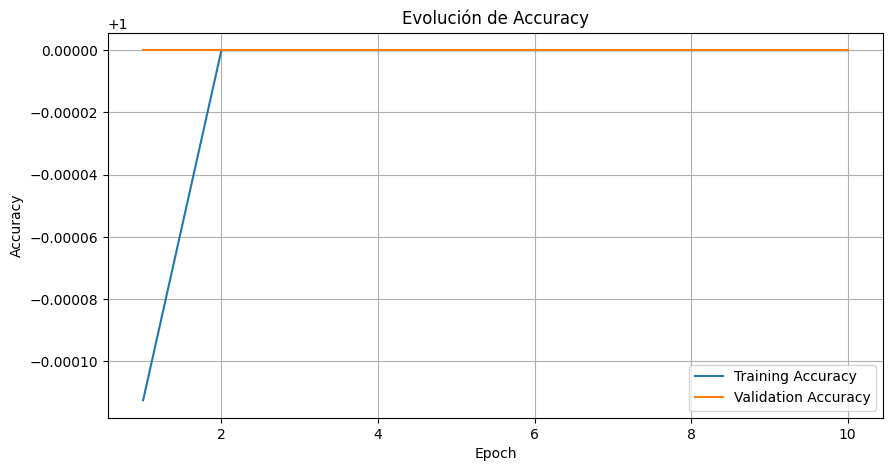

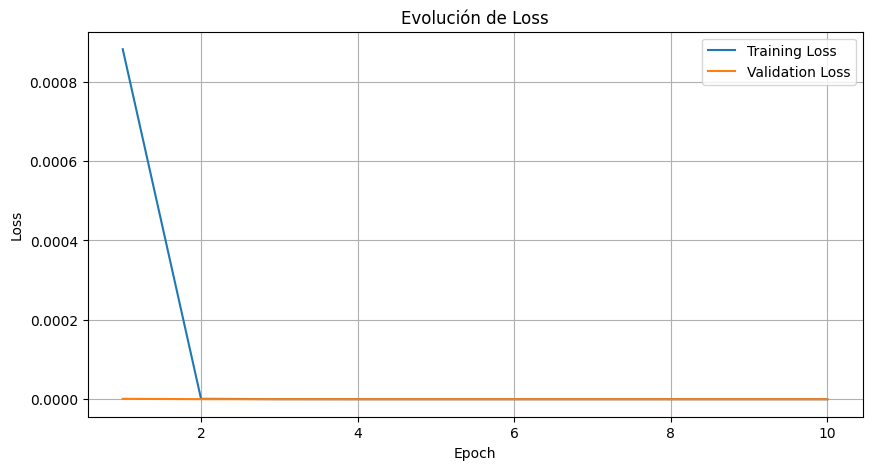

In [15]:

# Extraer historia
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

# Gr√°fica de precisi√≥n
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Evoluci√≥n de Accuracy')
plt.grid(True)
plt.show()

# Gr√°fica de p√©rdida
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Evoluci√≥n de Loss')
plt.grid(True)
plt.show()


# **BLOQUE 6: Evaluaci√≥n Final y Guardado del Modelo**

En esta etapa final, medimos el rendimiento del modelo sobre el set de prueba (test) y lo guardamos para futuros usos o despliegues. Este paso nos permite verificar si el modelo generaliza correctamente a nuevos datos. Una precisi√≥n alta indica un aprendizaje exitoso, sin sobreajuste.

In [16]:
# Evaluacion del set de test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"‚úÖ P√©rdida final en Test: {test_loss:.4f}")
print(f"‚úÖ Precisi√≥n final en Test: {test_accuracy:.4f}")


3125/3125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 3ms/step - accuracy: 1.0000 - loss: 3.4980e-11
‚úÖ P√©rdida final en Test: 0.0000
‚úÖ Precisi√≥n final en Test: 1.0000


In [17]:
# Guardado del modelo completo (arquitectura + pesos)
model.save('/content/lstm_word2vec_model.h5')

print("‚úÖ Modelo guardado exitosamente en /content/lstm_word2vec_model.h5")


‚úÖ Modelo guardado exitosamente en /content/lstm_word2vec_model.h5


# **Prueba 2: Dataset de 4 clases, todas sem√°nticamente relacionadas pero distintas**

Este bloque crea un segundo conjunto de datos sint√©tico, m√°s desafiante, con cuatro clases sem√°nticamente cercanas: Realeza, Transporte, Ciudad y Clima. A diferencia del dataset binario anterior, este incluye ruido controlado (palabras comunes a todas las clases) para evaluar la capacidad del modelo de distinguir matices sem√°nticos en contextos m√°s ambiguos.

Se agrega un grupo de palabras comunes, como "day", "world", "people", "news", que no pertenecen a ninguna clase espec√≠fica pero aparecen en todas. Esto simula el ruido que ocurre en textos reales donde ciertas palabras son frecuentes sin aportar informaci√≥n discriminativa clara.

In [18]:

# Vocabularios por clase
clase_0_palabras = [  # Realeza
    "king", "queen", "prince", "palace", "throne", "royal", "duke", "crown", "noble", "kingdom"
]
clase_1_palabras = [  # Transporte
    "car", "bus", "train", "engine", "traffic", "driver", "vehicle", "road", "wheel", "garage"
]
clase_2_palabras = [  # Ciudad
    "mayor", "building", "office", "square", "street", "city", "citizen", "tower", "apartment", "market",
    "crosswalk", "trafficlight", "block", "road", "avenue", "bridge", "district", "metro", "busstop", "subway",
    "skyscraper", "intersection", "alley", "sidewalk", "downtown", "neighborhood", "capital", "urban", "rural", "zone",
    "construction", "skyline", "fountain", "museum", "park", "restaurant", "mall", "library", "university", "school",
    "hospital", "police", "station", "firestation", "cemetery", "court", "cinema", "bank", "plaza", "highway",
    "lane", "exit", "entrance", "sign", "direction", "roadwork", "parking", "garage", "residence", "residential",
    "industrial", "commercial", "area", "buildingcode", "permit", "architecture", "renovation", "sculpture", "art",
    "cafeteria", "supermarket", "store", "boutique", "stadium", "arena", "field", "track", "theater", "monument",
    "heritage", "path", "trail", "zoning", "recreation", "eventhall", "convention", "auditorium", "government", "mayoral",
    "assembly", "council", "election", "vote", "legislation", "governance", "toll", "bridgeway", "public", "service"
]

clase_3_palabras = [  # Clima
    "sun", "rain", "snow", "storm", "cloud", "season", "cold", "hot", "wind", "weather",
    "fog", "hail", "drizzle", "humidity", "temperature", "forecast", "breeze", "heatwave", "climate", "tornado",
    "hurricane", "cyclone", "lightning", "thunder", "precipitation", "drought", "flood", "mist", "frost", "chill",
    "freezing", "overcast", "clear", "sky", "gust", "pressure", "barometer", "dew", "air", "ozone",
    "greenhouse", "warming", "atmosphere", "meteorology", "stormfront", "stormcloud", "raindrop", "sunshine", "sunbeam", "sunlight",
    "snowflake", "snowstorm", "icicle", "cloudburst", "windchill", "coldfront", "hotfront", "nimbus", "cumulus", "stratus",
    "cirrus", "vapor", "wet", "dry", "moderate", "mild", "severe", "extreme", "monsoon", "equator",
    "polar", "tropic", "blizzard", "windstorm", "heat", "temperaturedrop", "surge", "thunderstorm", "downpour", "airmass",
    "windgust", "airflow", "climatology", "weatherreport", "weatherstation", "gale", "stormwatch", "seasonal", "transition", "environment",
    "skywatch", "thermal", "solstice", "equinox", "ultraviolet", "radiation", "forecasting", "weatherballoon", "anemometer", "windvane"
]

# Palabras comunes (ruido compartido entre clases)
palabras_comunes = [
    "day", "night", "life", "world", "people", "news", "sound", "history", "event", "change"
]

# Funci√≥n para generar frases con palabras comunes mezcladas
def generar_frases_multiclase(palabras_clase, palabras_comunes, cantidad=5000, longitud=15):
    frases = []
    for _ in range(cantidad):
        n_ruido = random.randint(2, 4)
        n_clase = longitud - n_ruido
        palabras_finales = random.choices(palabras_clase, k=n_clase) + random.choices(palabras_comunes, k=n_ruido)
        random.shuffle(palabras_finales)
        frase = " ".join(palabras_finales)
        frases.append(frase)
    return frases

# Generacion de frases por clase
frases_0 = generar_frases_multiclase(clase_0_palabras, palabras_comunes)
frases_1 = generar_frases_multiclase(clase_1_palabras, palabras_comunes)
frases_2 = generar_frases_multiclase(clase_2_palabras, palabras_comunes)
frases_3 = generar_frases_multiclase(clase_3_palabras, palabras_comunes)

# Combinacion de frases y etiquetas
texts = frases_0 + frases_1 + frases_2 + frases_3
labels = [0]*len(frases_0) + [1]*len(frases_1) + [2]*len(frases_2) + [3]*len(frases_3)


combined = list(zip(texts, labels))
random.shuffle(combined)
texts, labels = zip(*combined)

print(f"‚úÖ Dataset multicategor√≠a generado: {len(texts)} frases (4 clases)")
print("Ejemplo:", texts[0], "->", labels[0])


‚úÖ Dataset multicategor√≠a generado: 20000 frases (4 clases)
Ejemplo: car vehicle road train bus garage wheel life driver garage sound bus event vehicle garage -> 1


# **BLOQUE 2: Preprocesamiento y Vectorizaci√≥n para Clasificaci√≥n Multiclase**

En este bloque se aplica el preprocesamiento completo al dataset multiclase de cuatro categor√≠as. Primero, se limpian los textos eliminando caracteres no alfab√©ticos, se convierten a min√∫sculas, se tokenizan y se filtran las palabras irrelevantes mediante una lista de stopwords en ingl√©s. Luego, cada palabra reconocida es convertida en su representaci√≥n vectorial usando el modelo Word2Vec preentrenado (GoogleNews). Se preprocesan y vectorizan todos los textos del corpus, obteniendo listas de vectores para cada frase. Para garantizar calidad, se eliminan los ejemplos que no contienen ninguna palabra reconocida por el modelo de embeddings. Finalmente, las etiquetas se convierten a arrays de NumPy, dejando el conjunto de datos listo para aplicar padding y entrenar el modelo. Este proceso asegura que solo se trabajen textos sem√°nticamente v√°lidos y representables, logrando una base robusta con 20.000 ejemplos vectorizados correctamente.

In [19]:
# Funci√≥n para limpieza y tokenizacion
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

# Funci√≥n para vectorizar una lista de tokens
def vectorize_text(tokens, w2v_model, vector_size=300):
    vectors = []
    for word in tokens:
        if word in w2v_model:
            vectors.append(w2v_model[word])
    return vectors

# Preprocesamiento de todos los textos
tokenized_texts = [preprocess_text(text) for text in texts]

# Vectorizacion de todos los textos
vectorized_texts = [vectorize_text(tokens, w2v_model) for tokens in tokenized_texts]

# Filtro de ejemplos sin vectores
X = []
y = []
for vecs, label in zip(vectorized_texts, labels):
    if len(vecs) > 0:
        X.append(vecs)
        y.append(label)

# Conversion etiquetas a array
y = np.array(y)

print(f"‚úÖ Textos vectorizados: {len(X)} ejemplos")


‚úÖ Textos vectorizados: 20000 ejemplos


# **BLOQUE 3: Padding, One-Hot Encoding y Split**

En esta etapa se aplica padding manual para asegurar que todas las secuencias vectoriales tengan la misma longitud, lo cual es esencial para entrenar una red LSTM. Luego, se codifican las etiquetas en formato one-hot para adaptarse al problema de clasificaci√≥n multiclase. Finalmente, se divide el conjunto de datos en entrenamiento (80%) y prueba (20%), dejando las matrices listas con el formato adecuado: 3 dimensiones para los vectores (muestras, pasos temporales, dimensiones del embedding) y etiquetas codificadas por clase.

In [20]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Padding
def prepare_sequences(list_of_vectors, max_len=None):
    vector_sequences = [np.array(seq) for seq in list_of_vectors]
    if not vector_sequences:
        return None
    if max_len is None:
        max_len = max(len(seq) for seq in vector_sequences)
    padded = []
    for seq in vector_sequences:
        if len(seq) < max_len:
            pad_width = ((0, max_len - len(seq)), (0, 0))
            padded_seq = np.pad(seq, pad_width, mode='constant')
        else:
            padded_seq = seq[:max_len]
        padded.append(padded_seq)
    return np.array(padded)

# Aplicacion padding
X_padded = prepare_sequences(X)

# One-hot encode de etiquetas
num_clases = len(set(y))
y_encoded = to_categorical(y, num_classes=num_clases)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)


print("‚úÖ Datos listos para LSTM Multiclase")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")


‚úÖ Datos listos para LSTM Multiclase
X_train: (16000, 15, 300)
y_train: (16000, 4)
X_test:  (4000, 15, 300)
y_test:  (4000, 4)


# **BLOQUE 4: Arquitectura LSTM para Clasificaci√≥n Multiclase**

En este bloque se define y entrena una red LSTM dise√±ada para clasificaci√≥n multiclase. El modelo consta de una capa LSTM con 128 unidades, seguida de una capa Dropout del 40% para prevenir el sobreajuste, y una capa de salida con activaci√≥n softmax que permite predecir entre cuatro clases distintas. Se utiliz√≥ la funci√≥n de p√©rdida categorical crossentropy y el optimizador Adam con tasa de aprendizaje de 0.001. El entrenamiento se realiz√≥ en 10 √©pocas con un batch size de 64, utilizando los datos previamente particionados, y el modelo resultante se guarda como modelo_final.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Definicion del modelo
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(num_clases, activation='softmax'))  # salida multiclase

# Compilacion
model.compile(
    loss='categorical_crossentropy',  # para multiclase
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Entrenamiento
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

modelo_final = model
print("‚úÖ Entrenamiento completado.")


Epoch 1/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 6ms/step - accuracy: 0.9695 - loss: 0.1645 - val_accuracy: 1.0000 - val_loss: 1.6072e-04
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - accuracy: 1.0000 - loss: 2.5138e-04 - val_accuracy: 1.0000 - val_loss: 5.5718e-05
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - accuracy: 1.0000 - loss: 1.0622e-04 - val_accuracy: 1.0000 - val_loss: 2.8716e-05
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - accuracy: 1.0000 - loss: 6.2961e-05 - val_accuracy: 1.0000 - val_loss: 1.7406e-05
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - accuracy: 1.0000 - loss: 4.2016e-05 - val_accuracy: 1.0000 - val_loss: 1.1553e-05
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - accuracy: 1.0000 - loss: 2.949

# **BLOQUE 5: Gr√°ficas de Precisi√≥n y P√©rdida + Evaluaci√≥n Final**

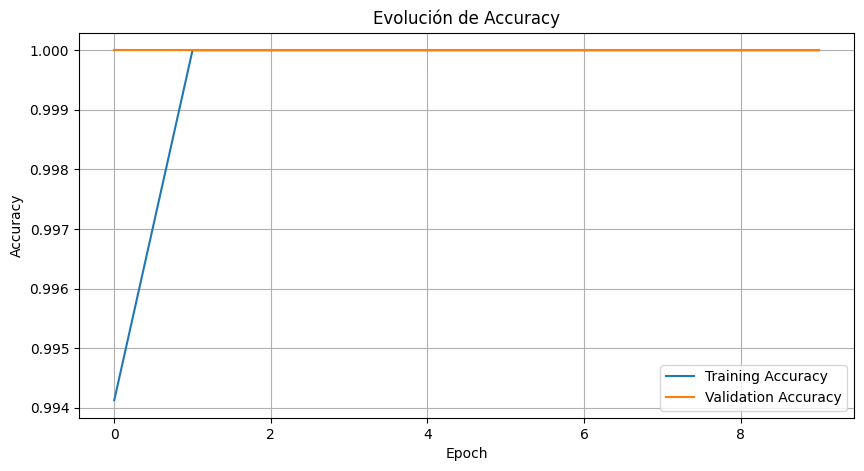

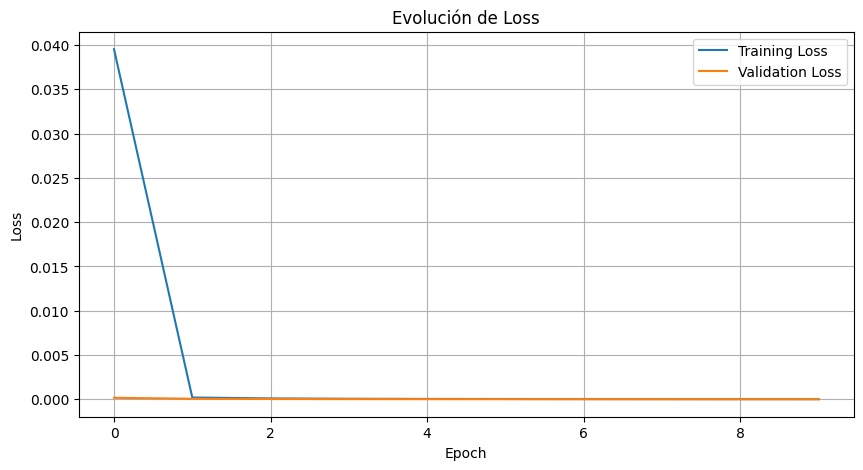

In [22]:

# Gr√°ficas de accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Evoluci√≥n de Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Gr√°ficas de loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Evoluci√≥n de Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


En esta etapa final, medimos el rendimiento del modelo sobre el set de prueba (test) y lo guardamos para futuros usos o despliegues. Este paso nos permite verificar si el modelo generaliza correctamente a nuevos datos. Una precisi√≥n alta indica un aprendizaje exitoso, sin sobreajuste.

# **BLOQUE 6: Evaluaci√≥n Final y Guardado del Modelo**

En esta etapa final, medimos nuevamente el rendimiento del modelo sobre el set de prueba (test) y lo guardamos para futuros usos o despliegues. Este paso nos permite verificar si el modelo generaliza correctamente a nuevos datos. Una precisi√≥n alta indica un aprendizaje exitoso, sin sobreajuste.

In [24]:
# Evaluacion del set de test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"‚úÖ P√©rdida final en Test: {test_loss:.4f}")
print(f"‚úÖ Precisi√≥n final en Test: {test_accuracy:.4f}")


125/125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - accuracy: 1.0000 - loss: 2.7678e-06
‚úÖ P√©rdida final en Test: 0.0000
‚úÖ Precisi√≥n final en Test: 1.0000


In [25]:
modelo_final.save('/content/lstm_word2vec_model_multiclase.h5')

print("‚úÖ Modelo multiclase guardado exitosamente en /content/lstm_word2vec_model_multiclase.h5")

‚úÖ Modelo multiclase guardado exitosamente en /content/lstm_word2vec_model_multiclase.h5


In [28]:
# archivos guardados en el directorio actual de trabajo
print("üìÇ Archivos en /content:")
for archivo in os.listdir("/content"):
    print(" -", archivo)


üìÇ Archivos en /content:
 - .config
 - drive
 - lstm_word2vec_model.h5
 - lstm_word2vec_model_multiclase.h5
 - sample_data


In [30]:
# BLOQUE 8: Verificaci√≥n de versiones de librer√≠as utilizadas

import sys
import numpy
import pandas
import matplotlib
import nltk
import gensim
import tensorflow
import sklearn

print("Python:", sys.version.split()[0])
print("NumPy:", numpy.__version__)
print("Pandas:", pandas.__version__)
print("Matplotlib:", matplotlib.__version__)
print("NLTK:", nltk.__version__)
print("Gensim:", gensim.__version__)
print("TensorFlow:", tensorflow.__version__)
print("Scikit-learn:", sklearn.__version__)


Python: 3.11.12
NumPy: 1.26.4
Pandas: 2.2.2
Matplotlib: 3.10.0
NLTK: 3.9.1
Gensim: 4.3.3
TensorFlow: 2.18.0
Scikit-learn: 1.6.1


# **Prueba Interactiva de Comparaci√≥n entre Modelos**

Este bloque permite realizar una evaluaci√≥n cualitativa interactiva de los modelos entrenados, comparando su desempe√±o ante frases nuevas no vistas. La funci√≥n predecir_texto realiza la predicci√≥n de una frase ingresada, aplicando preprocesamiento, vectorizaci√≥n con Word2Vec, padding manual y predicci√≥n mediante el modelo cargado. Se imprime la clase predicha junto con su probabilidad y la etiqueta correspondiente. Luego, la funci√≥n prueba_modelos_interactiva habilita un ciclo de ingreso manual donde se comparan las predicciones de dos modelos distintos: el modelo cl√°sico binario y el modelo LSTM multiclase ajustado.

In [31]:
def predecir_texto(texto, modelo, w2v_model, max_len):
    """
    Preprocesa el texto, lo vectoriza, aplica padding y predice con el modelo entrenado.
    """
    # Preprocesamiento
    tokens = preprocess_text(texto)

    # Vectorizacion
    vectorized = vectorize_text(tokens, w2v_model)
    if len(vectorized) == 0:
        return "‚ùå Ninguna palabra reconocida en Word2Vec."

    # Padding manual
    padded = prepare_sequences([vectorized], max_len=max_len)

    # Prediccion
    pred = modelo.predict(padded)
    clase_predicha = np.argmax(pred)
    probabilidad = pred[0][clase_predicha]

    # Etiquetas opcionales
    etiquetas = {
        0: "Realeza",
        1: "Transporte",
        2: "Ciudad",
        3: "Tiempo/Clima"
    }

    # Mostrar resultado
    return f"‚úÖ Predicci√≥n: Clase {clase_predicha} ({etiquetas[clase_predicha]}) con {probabilidad:.2%} de confianza"


In [32]:
def prueba_modelos_interactiva():
    """
    Permite al usuario ingresar una frase y ver la predicci√≥n de los tres modelos entrenados.
    """
    print("‚ú® Prueba interactiva: Comparaci√≥n entre modelos")
    print("üìù Escrib√≠ una frase en ingl√©s para clasificar su emoci√≥n o categor√≠a (escrib√≠ 'salir' para finalizar)\n")

    while True:
        texto_usuario = input("üí¨ Ingres√° una frase: ")
        if texto_usuario.lower() == "salir":
            print("üëã Prueba finalizada.")
            break

        print("\nüîµ Predicci√≥n modelo cl√°sico:")
        print(predecir_texto(texto_usuario, modelo_LSTM1, w2v_model, max_len=X_train.shape[1]))

        print("\nüü£ Predicci√≥n modelo LSTM ajustado:")
        print(predecir_texto(texto_usuario,modelo_final, w2v_model, max_len=X_train.shape[1]))

        print("-" * 60)


In [ ]:
prueba_modelos_interactiva()


‚ú® Prueba interactiva: Comparaci√≥n entre modelos
üìù Escrib√≠ una frase en ingl√©s para clasificar su emoci√≥n o categor√≠a (escrib√≠ 'salir' para finalizar)

üí¨ Ingres√° una frase: The weather is pretty sunny and hot

üîµ Predicci√≥n modelo cl√°sico:
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 145ms/step
‚úÖ Predicci√≥n: Clase 0 (Realeza) con 0.00% de confianza

üü£ Predicci√≥n modelo LSTM ajustado:
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 121ms/step
‚úÖ Predicci√≥n: Clase 3 (Tiempo/Clima) con 100.00% de confianza
------------------------------------------------------------
üí¨ Ingres√° una frase: The car has a broken engine 

üîµ Predicci√≥n modelo cl√°sico:
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 34ms/step
‚úÖ Predicci√≥n: Clase 0 (Realeza) con 0.00% de confianza

üü£ Predicci√≥n modelo LSTM ajustado:
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 34ms/step
‚úÖ Predicci√≥n: 